# Miniproyecto - Ciencia de datos

## Descripción

La tarea consiste en analizar y explorar un conjunto de datos sencillo, utilizando las herramientas vistas en clase: `numpy`, `pandas`, `matplotlib`, `seaborn`, `scikit-learn`, etc.

El conjunto de datos está en formato CSV, y se puede descargar [aquí](https://storage.googleapis.com/curso-eoi/sales.csv).

Cada fila del conjunto de datos describe una campaña de marketing con la cantidad de dinero que una empresa no especificada ha empleado en tres canales diferentes: televisión, radio y prensa, además de una última columna que lista las ventas conseguidas en dicha campaña. Las columnas `TV`, `radio` y `newspaper` indican la cantidad de dinero invertida en miles de euros, mientras que la columna `sales` indica miles de unidades vendidas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

## Paso 1

* Limpiar el conjunto de datos de aquellas filas en las que falten datos o haya valores extraños o fuera de rango (recordemos [`pandas.DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html))
* Crear tres scatter plots (o uno solo con tres subplots) con los ejes debidamente etiquetados, donde el eje X es la cantidad de dinero invertida en ese canal, y el eje Y representa el número de unidades vendidas
* **[OPCIONAL]** Utilizar plotting alternativo, como por ejemplo [`seaborn.regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html); este incluye automáticamente una recta de regresión sobre los datos y unos intervalos de confianza ajustables
* **[OPCIONAL]** Investigar acerca del coeficiente de correlación de Pearson (por ejemplo [aquí](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) y [aquí](https://realpython.com/numpy-scipy-pandas-correlation-python/)), calcularlo y mostrarlo sobre los plots. La funcion [`numpy.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) es útil para esto

El resultado debe ser similar a esto:

![Plots](data.png)

In [2]:
data = pd.read_csv('sales.csv')

In [3]:
data.describe()

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


In [4]:
# Remove missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Remove outliers
q = data['TV'].quantile(0.99)
data = data[data['TV'] < q]

In [5]:
data.describe()

,id,TV,radio,newspaper,sales
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,100.474227,145.444845,23.001031,30.246392,13.868557
std,57.831646,86.032061,14.846077,21.747570,5.135792
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.250000,71.300000,9.675000,12.650000,10.300000
50%,101.500000,148.500000,22.400000,25.600000,12.850000
75%,150.750000,218.475000,36.450000,43.275000,17.275000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'TV correlation: 0.78')

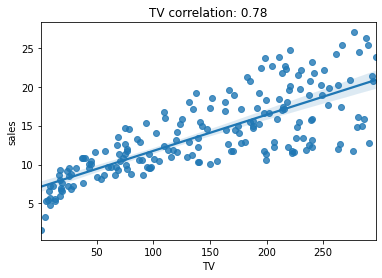

In [6]:
pcc_tv = np.corrcoef(data['TV'], data['sales'])[0, 1]
sns.regplot(x='TV', y='sales', data=data).set_title(f'TV correlation: {pcc_tv:.2f}')

Text(0.5, 1.0, 'radio correlation: 0.56')

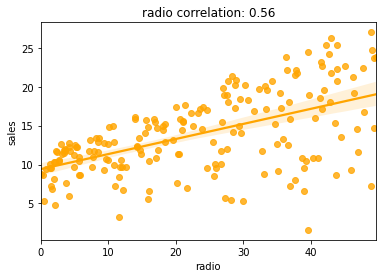

In [7]:
pcc_radio = np.corrcoef(data['radio'], data['sales'])[0, 1]
sns.regplot(x='radio', y='sales', data=data, color='orange').set_title(f'radio correlation: {pcc_radio:.2f}')

Text(0.5, 1.0, 'newspaper correlation: 0.20')

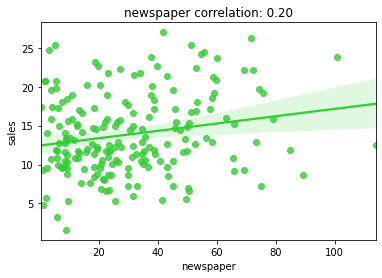

In [8]:
pcc_newspaper = np.corrcoef(data['newspaper'], data['sales'])[0, 1]
sns.regplot(x='newspaper', y='sales', data=data, color='limegreen').set_title(
    f'newspaper correlation: {pcc_newspaper:.2f}'
)

## Paso 2

Aumentar el dataset con las siguientes dos columnas generadas:

* Cantidad total invertida por venta, es decir, coste total (entre los tres canales) dividido por el número de ventas
* Un valor booleano (`true`/`false`, o `0`/`1`) que indique si la campaña de marketing fue _exitosa_. Una campaña es considerada exitosa si se cumplen **ambas** condiciones siguientes:
    * Cantidad total invertida por venta es menos de 20€
    * Más de 15000 unidades fueron vendidas

Responder a la pregunta: **¿Cuántas campañas fueron exitosas?**

In [9]:
data['total_invested'] = (data['TV'] + data['radio'] + data['newspaper']) / data['sales']
data['is_successful'] = (data['total_invested'] < 20) & (data['sales'] > 15)

successful_campaigns = data.is_successful.sum()
print(f'{successful_campaigns} campañas fueron exitosas.')

70 campañas fueron exitosas.


## Paso 3

* Crear un conjunto de entrenamiento seleccionando las filas con `id <= 160`
* Entrenar un clasificador [_Gaussian Naive-Bayes_](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) como vimos en clase para determinar si una campaña será exitosa, dadas las cantidades empleadas en cada canal de marketing
* Calcular la fracción del conjunto de entrenamiento que es clasificado correctamente.
* **[OPCIONAL]** Utilizar clasificadores alternativos, tales como regresión logística ([enlace](https://realpython.com/logistic-regression-python/), [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) o random forest ([enlace](https://www.datacamp.com/community/tutorials/random-forests-classifier-python), [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [10]:
data.loc[data['id'] <= 160].describe()

,id,TV,radio,newspaper,sales,total_invested
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,80.458065,141.704516,24.232258,32.023226,13.947097,13.891405
std,46.403123,86.283242,14.726202,22.155644,5.195406,4.032570
min,1.000000,0.700000,0.000000,0.300000,1.600000,2.437500
25%,40.500000,69.100000,11.650000,13.650000,10.200000,11.402990
50%,80.000000,137.900000,25.700000,28.900000,12.900000,13.559783
75%,120.500000,217.600000,36.900000,45.800000,17.400000,15.364644
max,160.000000,296.400000,49.600000,114.000000,25.400000,30.625000


In [11]:
X = data[['TV', 'radio', 'newspaper']]
y = data.is_successful

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=155, shuffle=False)

In [12]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_train = logistic_reg.predict(X_train)

In [13]:
train_classification_accuracy = accuracy_score(y_train, y_pred_train) * 100
print(f'Un {train_classification_accuracy:.2f}% del conjunto de entrenamiento fue clasificado correctamente.')

Un 92.90% del conjunto de entrenamiento fue clasificado correctamente.


## Paso 4

* Crear un conjunto de prueba seleccionando las filas con `id > 160`
* Evaluar el rendimiento del clasificador de la siguiente manera:
    * ¿Qué porcentaje del conjunto de prueba fue clasificado correctamente (aciertos sobre el total)? Es deseable que este número llegue al menos al 80%
    * ¿Cuál es la proporción de [falsos positivos y falsos negativos](https://en.wikipedia.org/wiki/False_positives_and_false_negatives)?

In [14]:
data.loc[data['id'] > 160].describe()

,id,TV,radio,newspaper,sales,total_invested
count,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000
mean,180.025641,160.310256,18.107692,23.184615,13.55641,14.532174
std,11.446643,84.480913,14.484972,18.674533,4.94463,4.770307
min,161.000000,17.200000,2.100000,3.600000,5.90000,7.328947
25%,170.500000,89.950000,5.550000,8.200000,10.40000,10.944141
50%,180.000000,168.400000,12.100000,19.400000,12.20000,15.054688
75%,189.500000,220.450000,29.450000,29.850000,16.50000,17.340128
max,200.000000,287.600000,48.900000,84.800000,27.00000,27.117647


In [15]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_test = gaussian_nb.predict(X_test)

In [16]:
test_classification_accuracy = accuracy_score(y_test, y_pred_test) * 100
print(f'Un {test_classification_accuracy:.2f}% del conjunto de prueba fue clasificado correctamente.')

Un 97.44% del conjunto de prueba fue clasificado correctamente.


In [17]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)

false_positives = confusion_matrix[0, 1]
false_negatives = confusion_matrix[1, 0]

print(f'{false_positives / 39 * 100}% de falsos positivos.')
print(f'{false_negatives / 39 * 100:.2f}% de falsos negativos.')

0.0% de falsos positivos.
2.56% de falsos negativos.


## Criterios de evaluación

En orden de importancia, se evaluará la entrega acorde a los siguientes puntos:

1. **<ins>Implementación de los puntos obligatorios en los cuatro pasos</ins>**
2. **<ins>Correctitud de los datos obtenidos</ins>**
3. **<ins>Implementación de los puntos opcionales</ins>**
4. **<ins>Organización y limpieza del código</ins>**

## Fecha límite de entrega

La tarea deberá ser entregada, a más tardar, el **miércoles 15 de julio** a las **23:59 WEST**

## Forma de entrega

Se habilitará una tarea en nuestro Google Classroom a tal efecto para poder subir los ficheros finales. El formato de entrega puede ser en Jupyter Notebook (preferible) o en ficheros `.py` directamente y `.png` para los plots.